<a href="https://colab.research.google.com/github/rohan0902/PatternAssigment/blob/main/Covid_19_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://cb.lk/covid_19

--2021-05-25 07:09:36--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-05-25 07:09:36--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-05-25 07:09:37--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-05-25 07:09:38--  https://www.dropbox.com/s/raw/7

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
Train_path = 'CovidDataset/Train'
Val_path = 'CovidDataset/Val'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.layers import *
from keras.models import *

In [5]:
import keras

In [6]:
#model initialize
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [8]:
train_datagen = image.ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2
)
# Data Augmentation 
test_datagen = image.ImageDataGenerator(rescale=1.0/255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size = (224,224),
    class_mode = 'binary',
    batch_size = 32
)

Found 224 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
val_generator = test_datagen.flow_from_directory(
    Val_path,
    target_size=(224,224),
    class_mode = 'binary',
    batch_size = 32
)

Found 60 images belonging to 2 classes.


In [12]:
#model training 
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 7,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 43s 1s/step - loss: 1.6737 - accuracy: 0.5023 - val_loss: 0.6908 - val_accuracy: 0.9500
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.6866 - accuracy: 0.5529 - val_loss: 0.6551 - val_accuracy: 0.8167
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.6024 - accuracy: 0.7280 - val_loss: 0.4661 - val_accuracy: 0.9167
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.4452 - accuracy: 0.7902 - val_loss: 0.2968 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.3105 - accuracy: 0.8511 - val_loss: 0.2191 - val_accuracy: 0.9500
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.3349 - accuracy: 0.8484 - val_loss: 0.2449 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.3040 - accuracy: 0.8510 - val_loss: 0.1376 - val_accuracy: 0.9667
Epoch 8/10
7/7 [========================

In [14]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [15]:
model1.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [31]:
hist1 = model1.fit_generator(
    train_generator,
    steps_per_epoch = 7,
    epochs = 7,
    validation_data = val_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
7/7 [==============================] - 9s 1s/step - loss: 0.2055 - accuracy: 0.9509 - val_loss: 0.0780 - val_accuracy: 0.9833
Epoch 2/7
7/7 [==============================] - 8s 1s/step - loss: 0.2170 - accuracy: 0.9286 - val_loss: 0.1108 - val_accuracy: 0.9500
Epoch 3/7
7/7 [==============================] - 8s 1s/step - loss: 0.2034 - accuracy: 0.9241 - val_loss: 0.1836 - val_accuracy: 0.9833
Epoch 4/7
7/7 [==============================] - 8s 1s/step - loss: 0.1437 - accuracy: 0.9375 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 5/7
7/7 [==============================] - 8s 1s/step - loss: 0.1985 - accuracy: 0.9554 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 6/7
7/7 [==============================] - 8s 1s/step - loss: 0.1285 - accuracy: 0.9643 - val_loss: 0.0731 - val_accuracy: 0.9833
Epoch 7/7
7/7 [==============================] - 8s 1s/step - loss: 0.1097 - accuracy: 0.9554 - val_loss: 0.0858 - val_accuracy: 0.9833


In [18]:
accuracy = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']

loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

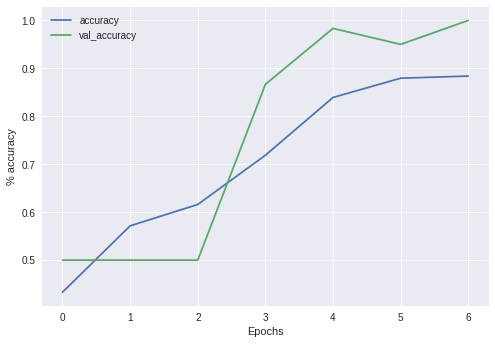

In [19]:
plt.style.use('seaborn')
plt.plot(accuracy,label='accuracy')
plt.plot(val_acc,label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('% accuracy')
plt.show()

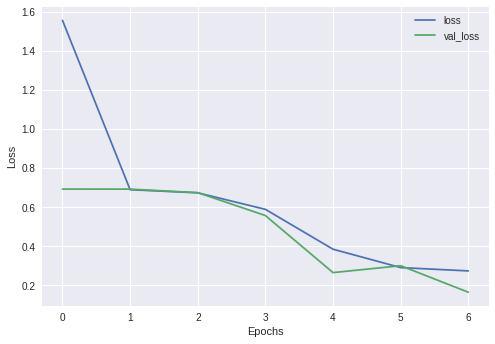

In [20]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
model2 = Sequential()
model2.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='sigmoid'))

In [22]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 54, 54, 128)      

In [23]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [24]:
hist2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 7,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 15s 2s/step - loss: 0.7672 - acc: 0.5453 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.6929 - acc: 0.5206 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.6933 - acc: 0.4758 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.6885 - acc: 0.5669 - val_loss: 0.6861 - val_acc: 0.5000
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.6585 - acc: 0.5796 - val_loss: 0.6797 - val_acc: 0.9500
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.6640 - acc: 0.6490 - val_loss: 0.6472 - val_acc: 0.8333
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.5834 - acc: 0.6894 - val_loss: 0.5042 - val_acc: 0.9667
Epoch 8/10
7/7 [==============================] - 8s 1s/step - loss: 0.4867 - acc: 0.7329 - val_loss: 0.3738 -

In [25]:
model.save('covid_19_model_0.h5')

In [26]:
model1.save('covid_19_model_1.h5')
model2.save('covid_19_model_2.h5')

In [33]:
new_model = tf.keras.models.load_model('covid_19_model_0.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [28]:
import tensorflow as tf